In [1]:
import pycaret
pycaret.__version__

'3.1.0'



Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction ➡️ Save Model

In [2]:
# laod sample from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

### Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. data and target. All the other parameters are optional.

In [4]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data=data,
          target='Class variable')

,Description,Value
0,Session id,5057
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple




Once the setup has been successfully executed it shows the information grid containing experiment level information.

    Session id: A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions.


- **Target type:** Binary, Multiclass, or Regression. The Target type is automatically detected.

- **Label Encoding:** When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type.

- **Original data shape:** Shape of the original data prior to any transformations.

- **Transformed train set shape :** Shape of transformed train set

- **Transformed test set shape :** Shape of transformed test set

- **Numeric features :** The number of features considered as numerical.

- **Categorical features :** The number of features considered as categorical.

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.


In [5]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [6]:
# check the type
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [7]:
# init setup on exp
exp.setup(data, target='Class variable')

,Description,Value
0,Session id,3782
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

### Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.


In [8]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:44:34
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7784,0.0000,0.5713,0.7345,0.6405,0.4845,0.4935,0.0090
lr,Logistic Regression,0.7766,0.8291,0.5713,0.7320,0.6383,0.4809,0.4904,1.1590
lda,Linear Discriminant Analysis,0.7747,0.8274,0.5713,0.7252,0.6368,0.4773,0.4856,0.0080
et,Extra Trees Classifier,0.7599,0.8204,0.5348,0.6996,0.6038,0.4372,0.4462,0.0540
nb,Naive Bayes,0.7580,0.8038,0.5985,0.6691,0.6287,0.4509,0.4544,0.0090
gbc,Gradient Boosting Classifier,0.7524,0.8184,0.5924,0.6567,0.6170,0.4369,0.4410,0.0340
catboost,CatBoost Classifier,0.7505,0.8285,0.5503,0.6708,0.5999,0.4229,0.4295,1.1210
rf,Random Forest Classifier,0.7413,0.8114,0.5509,0.6536,0.5943,0.4074,0.4125,0.0630
ada,Ada Boost Classifier,0.7394,0.8112,0.5450,0.6463,0.5880,0.4008,0.4053,0.0290
lightgbm,Light Gradient Boosting Machine,0.7375,0.7888,0.5763,0.6397,0.5997,0.4067,0.4118,0.1100


In [9]:
# compare models using OOP
exp.compare_models()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3782, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

### Analyze Model

You can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

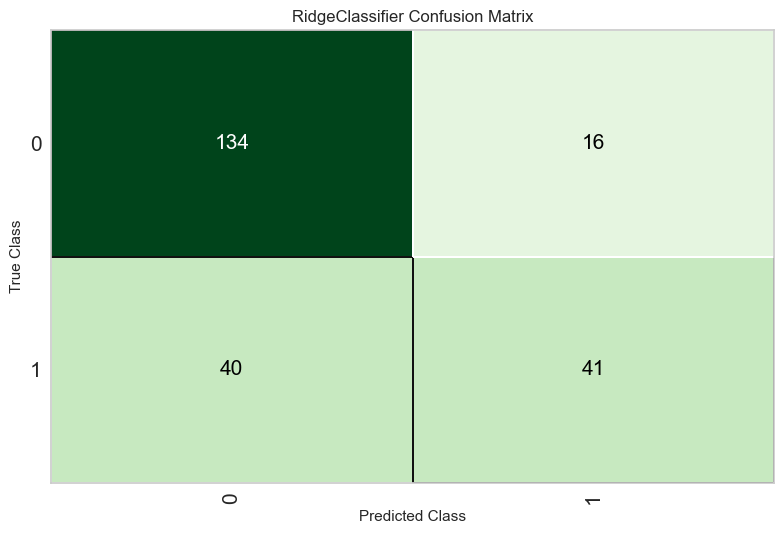

In [10]:
# plot confusion matrix
plot_model(best, plot='confusion_matrix')

In [11]:
plot_model(best, plot='auc')

TypeError: AUC plot not available for estimators with no predict_proba attribute.

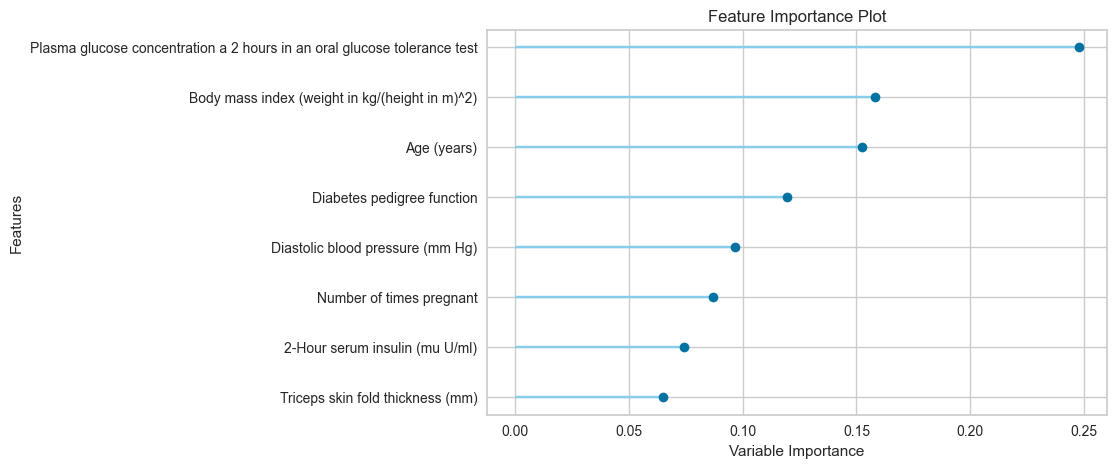

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots 
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, plot_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Union[str, NoneType] = None) -> Union[str, NoneType]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name

An alternate to plot_model function is evaluate_model. It can only be used in Notebook since it uses ipywidget.

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Prediction

The predict_model function returns prediction_label and prediction_score (probability of the predicted class) as new columns in dataframe. When data is None (default), it uses the test set (created during the setup function) for scoring.


In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7879,0.8485,0.5926,0.7500,0.6621,0.5106,0.5181


In [ ]:
# show prediction df
holdout_pred.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
80,3,113,44,13,0,22.400000,0.140,22,0,0,0.95
486,1,139,62,41,480,40.700001,0.536,21,0,0,0.64
186,8,181,68,36,495,30.100000,0.615,60,1,1,0.67
525,3,87,60,18,0,21.799999,0.444,21,0,0,0.99
212,7,179,95,31,0,34.200001,0.164,60,0,1,0.76


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the Class variable. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop class var

new_data = data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# predict model on new_data
predictions = predict_model(best, data=new_data)
predictions.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,0.82
1,1,85,66,29,0,26.600000,0.351,31,0,0.81
2,8,183,64,0,0,23.299999,0.672,32,1,0.84
3,1,89,66,23,94,28.100000,0.167,21,0,1.00
4,0,137,40,35,168,43.099998,2.288,33,1,0.87


### Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's save_model function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_w

In [12]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\mhmtc\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weigh...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=8361,
                                        verbose=0, warm_start=False))],
         verbose=False)

👇 Detailed function-by-function overview
✅ Setup

This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: data and target. All the other parameters are optional and are used for configuring data preprocessing pipeline.

# DETAILED OVERVIEW - TO DO